In [2]:
# Import

# Data Analysis
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
from scipy import sparse

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Text Processing
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Machine Learning packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import sklearn.cluster as cluster
from sklearn.manifold import TSNE


# Model training and evaluation
from sklearn.model_selection import train_test_split

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
from xgboost import plot_importance

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'wordcloud'

In [7]:
# loading dataset
data_set = pd.read_csv("./archive/mbti_1.csv")
data_set.tail()

,type,posts
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...
8674,INFP,'It has been too long since I have been on per...


In [8]:
# dataset info
print(data_set.isnull().any(),"\n\n")
nRow, nCol = data_set.shape
print(f'There are {nRow} rows and {nCol} columns\n\n')
print("data types are ", data_set.dtypes,"\n\n")
print(data_set.info())
print(data_set.describe(include=['object']))

type     False
posts    False
dtype: bool 


There are 8675 rows and 2 columns


data types are  type     object
posts    object
dtype: object 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB
None
        type                                              posts
count   8675                                               8675
unique    16                                               8675
top     INFP  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq    1832                                                  1


In [9]:
types = np.unique(np.array(data_set['type']))
total = data_set.groupby(['type']).count()

**Preprocessing**

In [10]:
# 각 항목 별 columns 추가 
 
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E not found') 
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S not found')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F not found')
        
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P not found')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

data = data_set.join(data_set.apply (lambda row: get_types (row),axis=1))
data.head(5)
#IE 

,type,posts,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,0,1,1,1


Introversion (I) /  Extroversion (E):	 1999  /  6676
Intuition (N) / Sensing (S):		 1197  /  7478
Thinking (T) / Feeling (F):		 4694  /  3981
Judging (J) / Perceiving (P):		 5241  /  3434


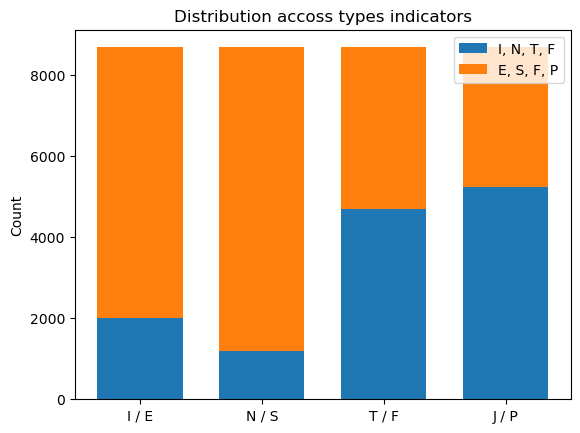

In [11]:
# 항목 별 나온 횟수 
print ("Introversion (I) /  Extroversion (E):\t", data['IE'].value_counts()[0], " / ", data['IE'].value_counts()[1])
print ("Intuition (N) / Sensing (S):\t\t", data['NS'].value_counts()[0], " / ", data['NS'].value_counts()[1])
print ("Thinking (T) / Feeling (F):\t\t", data['TF'].value_counts()[0], " / ", data['TF'].value_counts()[1])
print ("Judging (J) / Perceiving (P):\t\t", data['JP'].value_counts()[0], " / ", data['JP'].value_counts()[1])
#Plotting the distribution of each personality type indicator
N = 4
bottom = (data['IE'].value_counts()[0], data['NS'].value_counts()[0], data['TF'].value_counts()[0], data['JP'].value_counts()[0])
top = (data['IE'].value_counts()[1], data['NS'].value_counts()[1], data['TF'].value_counts()[1], data['JP'].value_counts()[1])

ind = np.arange(N)    # the x locations for the groups
# the width of the bars
width = 0.7           # or len(x) can also be used here

p1 = plt.bar(ind, bottom, width, label="I, N, T, F")
p2 = plt.bar(ind, top, width, bottom=bottom, label="E, S, F, P") 

plt.title('Distribution accoss types indicators')
plt.ylabel('Count')
plt.xticks(ind, ('I / E',  'N / S', 'T / F', 'J / P',))
plt.legend()

plt.show()

In [12]:
# 16가지 MBTI -> Binaryzation

lemmatiser = WordNetLemmatizer()

# Stop word 제거
useless_words = stopwords.words("english")

unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
unique_type_list = [x.lower() for x in unique_type_list]

# Splitting 
binary_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
binary_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    return [binary_Pers[l] for l in personality]

# 결과 출력용
def translate_back(personality):
    # binary vector -> mbti personality
    s = ""
    for i, l in enumerate(personality):
        s += binary_Pers_list[i][l]
    return s

list_personality_bin = np.array([translate_personality(p) for p in data.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)

Binarize MBTI list: 
[[0 0 0 0]
 [1 0 1 1]
 [0 0 1 1]
 ...
 [0 0 1 1]
 [0 0 0 1]
 [0 0 0 1]]


In [13]:
# Noise 제거
def pre_process_text(data, remove_stop_words=True, remove_mbti_profiles=True):
  list_personality = []
  list_posts = []
  len_data = len(data)
  i=0
  
  for row in data.iterrows():
      # check code working 
      # i+=1
      # if (i % 500 == 0 or i == 1 or i == len_data):
      #     print("%s of %s rows" % (i, len_data))

      #Remove and clean comments
      posts = row[1].posts

      #Remove url links 
      temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)

      #Remove Non-words - keep only words
      temp = re.sub("[^a-zA-Z]", " ", temp)

      # Remove spaces > 1
      temp = re.sub(' +', ' ', temp).lower()

      #Remove multiple letter repeating words
      temp = re.sub(r'([a-z])\1{2,}[\s|\w]*', '', temp)

      #Remove stop words
      if remove_stop_words:
          temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in useless_words])
      else:
          temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])
          
      #Remove MBTI personality words from posts
      if remove_mbti_profiles:
          for t in unique_type_list:
              temp = temp.replace(t,"")

      # transform mbti to binary vector
      type_labelized = translate_personality(row[1].type) #or use lab_encoder.transform([row[1].type])[0]
      list_personality.append(type_labelized)
      # the cleaned data temp is passed here
      list_posts.append(temp)

  # returns the result
  list_posts = np.array(list_posts)
  list_personality = np.array(list_personality)
  return list_posts, list_personality

list_posts, list_personality  = pre_process_text(data, remove_stop_words=True, remove_mbti_profiles=True)

print("\nPost before preprocessing:\n\n", data.posts[0])
print("\nPost after preprocessing:\n\n", list_posts[0])
print("\nMBTI before preprocessing:\n\n", data.type[0])
print("\nMBTI after preprocessing:\n\n", list_personality[0])


Post before preprocessing:

 'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010

In [14]:
nRow, nCol = list_personality.shape
print(f'No. of posts = {nRow}  and No. of Personalities = {nCol} ')

No. of posts = 8675  and No. of Personalities = 4 


In [15]:
# Vectorization
cntizer = CountVectorizer(analyzer="word", 
                             max_features=1000,  
                             max_df=0.7,
                             min_df=0.1) 
# the feature should be made of word n-gram 
# Learn the vocabulary dictionary and return term-document matrix
print("Using CountVectorizer :")
X_cnt = cntizer.fit_transform(list_posts)

#The enumerate object yields pairs containing a count and a value (useful for obtaining an indexed list)
feature_names = list(enumerate(cntizer.get_feature_names_out()))
print("10 feature names can be seen below")
print(feature_names[0:10])

# For the Standardization or Feature Scaling Stage :-
# Transform the count matrix to a normalized tf or tf-idf representation
tfizer = TfidfTransformer()

# Learn the idf vector (fit) and transform a count matrix to a tf-idf representation
print("\nUsing Tf-idf :")

print("Now the dataset size is as below")
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()
print(X_tfidf.shape)

#counting top 10 words
reverse_dic = {}
for key in cntizer.vocabulary_:
    reverse_dic[cntizer.vocabulary_[key]] = key
top_10 = np.asarray(np.argsort(np.sum(X_cnt, axis=0))[0,-10:][0, ::-1]).flatten()
[reverse_dic[v] for v in top_10]

Using CountVectorizer :
10 feature names can be seen below
[(0, 'ability'), (1, 'able'), (2, 'absolutely'), (3, 'across'), (4, 'act'), (5, 'action'), (6, 'actually'), (7, 'add'), (8, 'advice'), (9, 'afraid')]

Using Tf-idf :
Now the dataset size is as below
(8675, 595)


['feel',
 'type',
 'well',
 'say',
 'way',
 'friend',
 'want',
 'love',
 'good',
 'something']

In [16]:
#변환된 comment list
print("X: 1st posts in tf-idf representation\n%s" % X_tfidf[0])

X: 1st posts in tf-idf representation
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.08105478 0.07066064
 0.         0.         0.         0.         0.         0.
 0.         0.04516864 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.05321691 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.0871647  0.         0.         0.
 0.         0.         0.         0.05506308 0.0708757  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.16585935 0.         0.         0.09676192 0.
 0.         0.04970682 0.         0.         0.         0.
 0.07397056 0.         0.         0.         0.         0.
 0.       

In [17]:
personality_type = [ "IE: Introversion (I) / Extroversion (E)", "NS: Intuition (N) / Sensing (S)", 
                   "FT: Feeling (F) / Thinking (T)", "JP: Judging (J) / Perceiving (P)"  ]

for l in range(len(personality_type)):
    print(personality_type[l])

IE: Introversion (I) / Extroversion (E)
NS: Intuition (N) / Sensing (S)
FT: Feeling (F) / Thinking (T)
JP: Judging (J) / Perceiving (P)


In [18]:
#Train with XGBoost(Best fit) 

X = X_tfidf
# setup parameters for xgboost
param = {}

param['n_estimators'] = 200 
param['max_depth'] = 3 
param['nthread'] = 8 
param['learning_rate'] = 0.1 

# Individually training each mbti personlity type
for l in range(len(personality_type)):
    Y = list_personality[:,l]

    # split data into train and test sets
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    # fit model on training data
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) Accuracy: 77.61%
NS: Intuition (N) / Sensing (S) Accuracy: 85.99%
FT: Feeling (F) / Thinking (T) Accuracy: 69.09%
JP: Judging (J) / Perceiving (P) Accuracy: 64.44%


In [19]:

X = X_tfidf
Y = list_personality  # 모든 성격 유형을 포함하는 배열

# 파라미터 설정
param = {
    'n_estimators': 200,
    'max_depth': 3,
    'nthread': 8,
    'learning_rate': 0.1
}

# 데이터 분할
# seed = 7
test_size = 0.33
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

# XGBoost 모델 초기화 및 MultiOutputClassifier로 래핑
model = MultiOutputClassifier(XGBClassifier(**param))

# 모델 학습
model.fit(X_train, Y_train)

# 예측 수행
Y_pred = model.predict(X_test)

# 정확도 계산
accuracies = [accuracy_score(Y_test[:, i], Y_pred[:, i]) for i in range(Y_test.shape[1])]
for i, acc in enumerate(accuracies):
    print("%s Accuracy: %.2f%%" % (personality_type[i], acc * 100))

IE: Introversion (I) / Extroversion (E) Accuracy: 77.68%
NS: Intuition (N) / Sensing (S) Accuracy: 85.78%
FT: Feeling (F) / Thinking (T) Accuracy: 69.44%
JP: Judging (J) / Perceiving (P) Accuracy: 62.63%


In [21]:
# Test 함수
import joblib
model = joblib.load('model.pkl')
def Text_to_MBTI(text):
    data = pd.DataFrame(data={'type' : ['ENFP'], 'posts' : [text]})

    text, dummy  = pre_process_text(data, remove_stop_words=True, remove_mbti_profiles=True)

    my_X_cnt = cntizer.transform(text)
    my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

    predicted_personlaity = model.predict(my_X_tfidf)
    return translate_back(predicted_personlaity[0])

my_posts = 'Second place is going to school everyday  LOL  real  Yesterday  To Sejin  I got in trouble  a timetable  I dont even know how to watch it  LOL. LOL  sugang.cau.ac.kr  Its here, right?  What  a shopping basket  Why is it in here?  Picture  What is it  Oh, but  a small ball  Its non-face-to-face  Reference  LOL  Sometimes, Im small  Except for real-time  Just in case  Compas Harmony  Preparation  Im going to put it in  ones last price  I have a part-time job  I think well have a harmonious relationship  The algorithm  Its a video clip  Well ..  I came early  Ill do some homework  Its better to do it  I think itll be better  Really lol  This  as a test  as if its open  All womens seats are 50 years old  LOL  [Laughing]  The drawing  Out of six  At least four  Its as bad as it is  LOL  Look at it with Eta  a childless child  24 days  Im back to school  Dont forget  Capton  the beat of the application program  real  I think Im going to get poop  Its drizzling  gg  The discharge certificate is  How can I raise it  Okay, okay  Picture  This should be uploaded, right?  Me too  discharge certificate  I want to get it  I didnt get it when I was discharged  Shit  Should I file a civil complaint  They want me to send it by courier  The executive didnt take it from generation to generation  ㅅㅂ ㅋㅋ  That paper  To break the military savings  the day before ones discharge from military service  I picked it out  I didnt get it until the end  real  137 is  a deep-rooted evil  Ive heard from my successors  I ate snacks this time  I heard you poked the horseshoe  LOL. LOL  I.N. Funny  (Singing LOL)  Its a bit  mzs  I had a replacement like a sample  He used to do that  Its a spectacle  [Laughing]  I heard there was an investigation every time  He said nothing happened. LOL  ㄴ웃 Funny  Algorithms  Its flat  Ill have to look at the plutter  5pm~  5:30pm! Part-time job.  Nine Oclock  Ugh  Friday night?  Tomorrow, Ill go to the hair salon  I made a reservation  Im afraid Im going to lose time  Weekend  I dont know  gogo  lt Shubal  We all decided to go together  I was hurt because I wasnt going  Just me and Dongjin  I was caught  With KANGMIN KYU  the first form of a family  At the meeting of the Ministry of Education  I said I was going to go  a new word;;  real  Go a little earlier  Im a part-timer  What  Your phone island?  Hhhhhhhhhhhhhhhhhhh~  I dont have any ㅓ  Seaweed  i is also a ㅔㅆ  I cant walk  Its been a month and a half  Since youre doing the lower body  Im not tired  [Laughing]  Im cold  Mom and Dad  I dont care  Because youre coming  You decide  In 15 minutes at the gym  the feeling of being in Jamsil  Do you just read the Monday night paper?  I ran on the lower body  Its really hard  Hehehehehehehehehehehehehehehehehehehe  i. Its cold  okay  video  wtf  stairs  Why are you going down  I went to Lt  Im coming to Sunday  I think itll be late in the afternoon?  If you dont drink a lot the day before  I think itll work  Oh, my  Where can I see you  I like ㅊㄱ  Lunch?  gogo  H  Cell phone  Im here  ㅅB!!!  24  Its so pretty  The sensitivity of the iPhone  Its loaded.  The back  I think its an iPhone  yes  So pretty  I  Blue  a collar for Samsung  hkong@student.42seoul.kr  solsol0724!  Kimo Chi Man  Tomorrow  Application for cap  Must be done  File: 2024-01 Capstone Design (2) Announcement.pdf  Its 10 oclock tomorrow  All three of us have to do it  Okay, okay  Im tired  xingxing2001@naver.com  010-3462-8765  20204169  ??  Didnt you change your phone last year?  Ah.  My stomach hurts  Lets hit it around 8pm yesterday  I woke up at 3:30  I cant sleep  Sleep at 7 oclock lol  Me too  Itll work, right?  If you dont sleep  I think Im going to be tired  If I sleep  I cant sleep because I think Ill wake up late in the afternoon  Im tired  We  Wednesdays Day  Where did you see it  I like it  We  Was it until 2 oclock  Im going to run after lunch  You cant go to Jamsil?  Ah.  Jang Seungbaegi (Jang Seungbaegi) LOL  But I  My friend who used to live abroad  Lets have lunch on Wednesday  Huh.  Do you think itll be a jangseungbaegi?  Ill see you at 12 oclock  I dont think it matters  In an hour  Im going  gogo  a sea bream  Do you like tablets  Android Studio  Its heavy  Im opening the flutter, but Han Sewol is not..  Im on my way to plutter sdk  It wont be a problem, will it?  Setting up the idea is the hardest...  Picture  Ah.  Watch your laptop  Its so slow  Ah.  Even thinking about the computer  Im getting dizzy  Once  a hundred pages  I was taking a lecture  http  What is it  What is it  I dont know even if I take a lecture  I need to know the hundred  The front  Itll be comfortable  We  Are you going to use the back spring?  ones last price  Aws is kind of  I can do it  Okay, okay  Ans  Shubal  In the setup  Its clogged  Picture  No, its taking a long time  real  Wi-Fi  in the thick of a persons neck  Buzz is  Theres nothing left  I dont care  lol  gogo  Lets go somewhere  Branch  Jamsil Station  Dear Twosome  Pascucci  Im sure there are a lot of people in Starbucks  lol  Do LOL  What  Why isnt it over yet  What should I do  Map: 558, Songpa-daero, Songpa-gu, Seoul (Sincheon-dong 7)  Come to Pascucci  a meeting  I think it wont take long  Lets study separately until we have time'
print(Text_to_MBTI(my_posts))



INTP


In [21]:
import joblib

joblib.dump(model, 'model.pkl')

['model.pkl']

INFP
